<p align=center style ="font-size:26px;"> 
<b> LAB 10: PROCESAMIENTO DE SEÑALES ECG </b>
 </p>

#### **Tabla de Contenido**  

1. [Introducción](#introduccion)  
2. [Objetivos](#objetivos)  
3. [Materiales](#materiales)  
4. [Procedimiento](#procedimiento)  
5. [Resultados](#resultados)  
6. [Discusión](#discusion)  
7. [Conclusiones](#conclusiones)  
8. [Bibliografía](#bibliografia)  
    






 

 

   

 


 


## Introducción  
La electrocardiografía (ECG) es una técnica fundamental en el diagnóstico y monitoreo de diversas condiciones cardíacas. Esta consiste en registrar la actividad eléctrica del corazón, de modo que la señal captada refleja los eventos eléctricos que suceden durante el ciclo cardíaco como la despolarización y repolarización de las aurículas y ventrículos[1]. Entonces, uno de los desafíos presentes en la señal ECG es la presencia de diversos factores de ruido que ocasionan la distorsión de la señal, lo que resulta en la complicación de la interpretación de la señal. Los principales tipos de ruido son los siguientes[2]:
- Ruido por interferencia de línea eléctrica (60/50 Hz): Asociado a fuentes de alimentación eléctrica que inducen interferencias en la señal por la radiación electromagnética.
- Ruido de movimiento del paciente y electrodos: Asociado a los movimientos corporales y el desplazamiento de los electrodos, lo que genera artefactos mecánicos y eléctricos.
- Ruido de la contracción muscular: Asociado a la actividad muscular que puede superponerse a la señal ECG.

Para obtener información precisa de la señal ECG, es necesario aplicar técnicas para el procesamiento de señales que puedan lograr reducir el ruido y realzar las características relevantes presentes en la señal captada. Para esto, se utilizó la biblioteca neurokit2, lo que nos permitió realizar el procesamiento de la señal mediante el uso de las siguientes funciones [3]:
- ecg_clean(): Esta función de preprocesamiento es diseñada para filtrar el ruido de la señal ECG y mejorar la precisión en la detección de picos. Se requiere la señal ECG cruda y la frecuencia de muestreo, de modo que el método de filtrado aplicado (por defecto) es un filtro pasa-altas Butterworth de 0.5 Hz de orden 5, seguido de un filtro para eliminar ruido de línea (50 Hz). Por lo tanto, el resultado sería la señal ECG filtrada.
- ecg_process(): Esta función realiza una secuencia completa para el procesamiento de la señal ECG, combinando las etapas de limpieza, detección de picos R, cálculo de la frecuencia cardíaca, evaluación de la calidad de la señal, delineación del complejo QRS y la determinación de fases cardíacas. Se requiere la señal ECG cruda y la frecuencia de muestreo y se utiliza el método de filtrado por defecto explicado anteriormente. Por lo tanto, el resultado obtenido sería un *DataFrame* con la señal cruda, señal limpia, frecuencia cardíaca interpolada, calidad de la señal e información detallada sobre picos y fases cardíacas (P, Q, R, S y T). Además, proporciona un diccionario con la ubicación de los picos R.
- ecg_analyze(): Esta función realiza un análisis detallado de la señal ECG, extrayendo características e índices relevantes. Es adecuada para análisis de datos en intervalos largos o en eventos específicos. Se requiere los datos procesados por ecg_process() junto con la frecuencia de muestreo. De modo que, se utilizan dos tipos de métodos dependiendo de la duración media de los datos. Para segmentos cortos de datos, se utilizará *event-related* que permite analizar respuestas rápidas del sistema cardíaco. Por otro lado, para periodos largos, se utlizará *interval-related*. Por lo tanto, el resultado obtenido sería un *DataFrame* con las características y métricas del ECG.
- ecg_plot(): Esta función genera una gráfica de la señal ECG procesada, marcando visualmente los picos R detectados. Se requiere el *DataFrame* resultante de la función ecg_process(). De modo que el resultado sería la figura con las señales y eventos detectados en el ECG.

## **Objetivos**  

<p align="Jutify">

- Entender como funcionan las librerias `NeuroKit2` y `ecg_plot` (principalmente algunas funciones)
- Emplear las funciones `ecg_clean`,`ecg_process`,`ecg_analyze`,`ecg_plot` de la libreria NeuroKit2  
- Emplear la funcion `ecg_plot_1` de la libreria ecg_plot
- Analizar los parametros de salida que nos brinda ciertas funciones (`nk.ecg_clean`,`nk.ecg_plot`,`ecg.plot.plot_1`, etc)
- Comparar los parámetros de salida de las funciones para cada derivada (DI, DII, DIII) en las actividades de basal, aguantar la respiración 10 segundos y post-ejercicio.
<p>

<table align="center">
    <tr>
        <td align="center"><b>Materiales</b></td>
    </tr>
    <tr>
        <td><b>Señales ECG adquiridas del lab 5</b></td>
    </tr>
    <tr>
        <td><b>Python notebook</b></td>
    </tr>
    <tr>
        <td><b>Librería NeuroKit2</b></td>
    </tr>
    <tr>
        <td><b>Librería ecg_plot</b></td>
    </tr>
    <tr>
        <td><b>Librerías comúnmente utilizadas (matplotlib.pyplot, pandas, numpy, etc.)</b></td>
    </tr>
</table>




## **Procedimiento** 

<p align="justify">

- **Adquisición de las señales de ECG**  
  Se adquieren las señales de ECG utilizando el **BITalino** y el **OpenSignals**. Estas señales se obtuvieron en el laboratorio 5 de este repositorio. Las bioseñales fueron capturadas en tres condiciones: actividad basal, apnea de 10 segundos y post-ejercicio, registrándose en sus respectivas derivadas estándar (DI, DII, DIII).

- **Librerías a utilizar**  
  Para el análisis de la señal de ECG, se utilizaron las librerías **NeuroKit2** y **ecg_plot**.

- **Escalamiento de la señal recién obtenida del BITalino**  
  Los valores de la señal obtenidos del BITalino están en formato digital, con un rango de 0 a 1023. Para convertirlos a milivoltios (mV), que es el formato ideal para el análisis de ECG, se realizó un escalado de la siguiente manera:

  $$
  \frac{\text{Señal a analizar} \times 1.2 \, \text{mV}}{\text{Máximo valor de la señal a analizar}}
  $$

- **Procesamiento de la señal:**
  - Se utiliza la función `ecg_clean` de la librería NeuroKit2 para limpiar la señal escalada, eliminando posibles artefactos.
  
  - Luego, se emplea la función `ecg_process` en la señal limpiada, obteniendo los parámetros `signals` (un DataFrame con la señal filtrada, frecuencia cardíaca, etc.) e `info` (un diccionario con información adicional sobre la señal procesada).

  - La señal es analizada con la función `ecg_analyze`, que proporciona varios parámetros como la variabilidad de la frecuencia cardíaca (HRV) y otros aspectos clínicamente relevantes.

  - Con la función `ecg_plot` de NeuroKit2 (`nk.ecg_plot`), se genera una gráfica de la señal analizada, mostrando parámetros importantes en la visualización.

  - Se realiza un nuevo escalamiento a la señal limpia, análogo al inicial, con el siguiente ajuste:

    $$
    \frac{\text{Señal limpiada} \times 1.5 \, \text{mV}}{\text{Máximo valor de la señal limpiada}}
    $$

    Así obtenemos la señal "limpiada-escalada".

  - Usando la librería **ecg_plot**, se genera un nuevo gráfico de la señal "limpiada-escalada" mediante la función `plot_1` (`ecg_plot.plot_1`). Esto se debe a que `ecg_plot` acepta este tipo de señales en formato de array, mientras que los parámetros obtenidos de `ecg_process` son DataFrames.

Se realizaron gráficos adicionales de la señal cruda y de la señal limpiada utilizando `matplotlib.pyplot`, facilitando así una visualización progresiva durante el procesamiento de la señal.

</p>


## Resultados 

-  ### Basal

#### DI


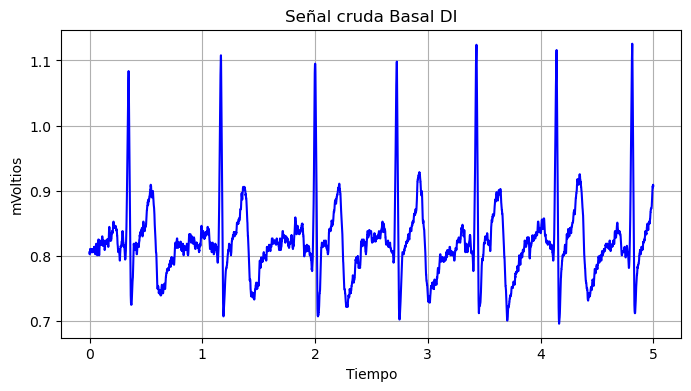

c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


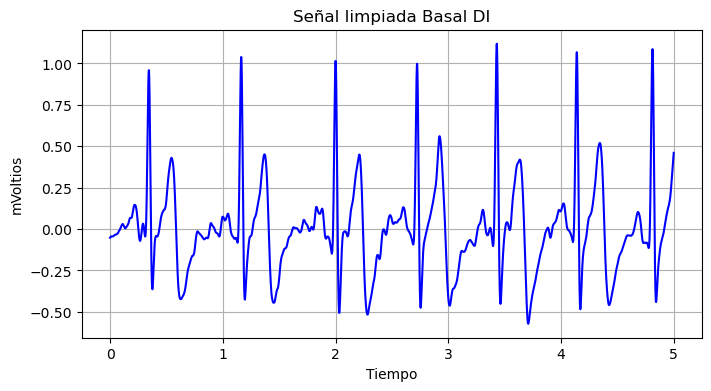

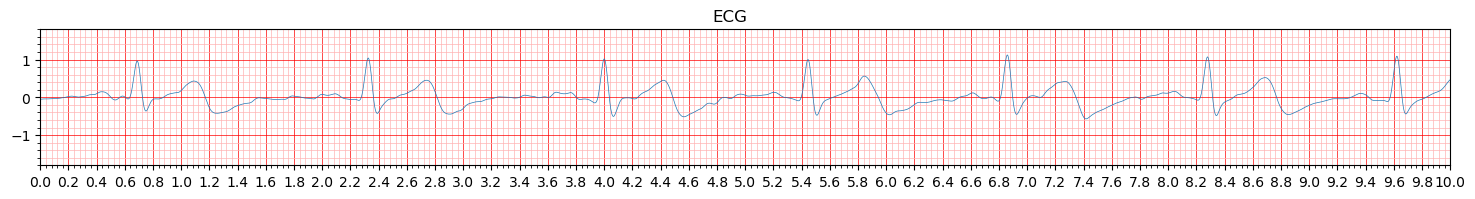

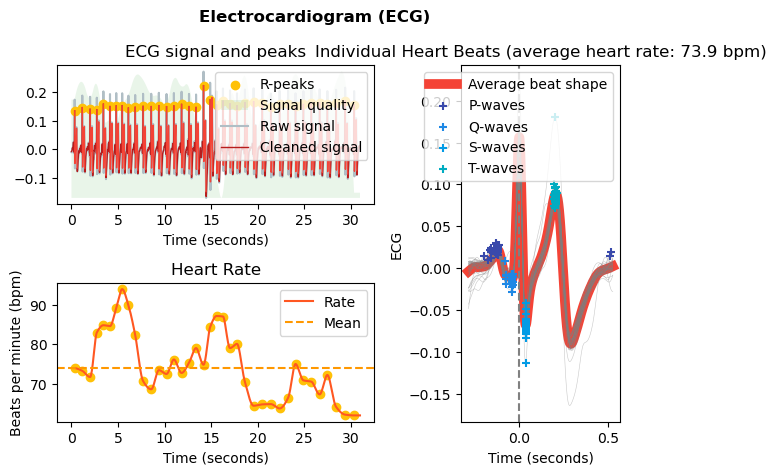

In [82]:
R1 = funcion_leer("basal/R1.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R1,"Basal DI") 

#### DII


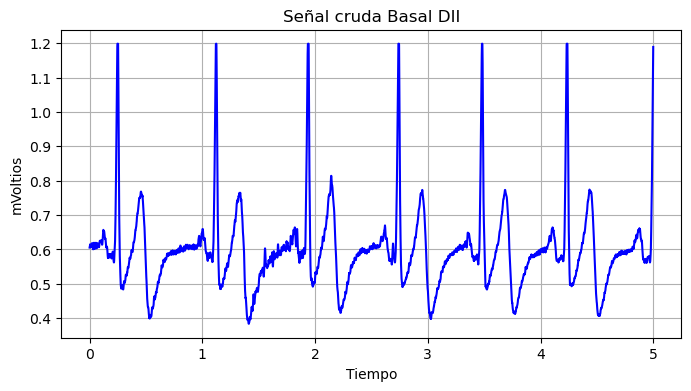

c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


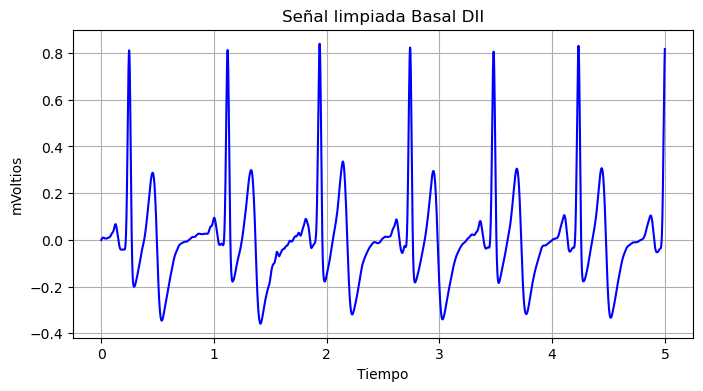

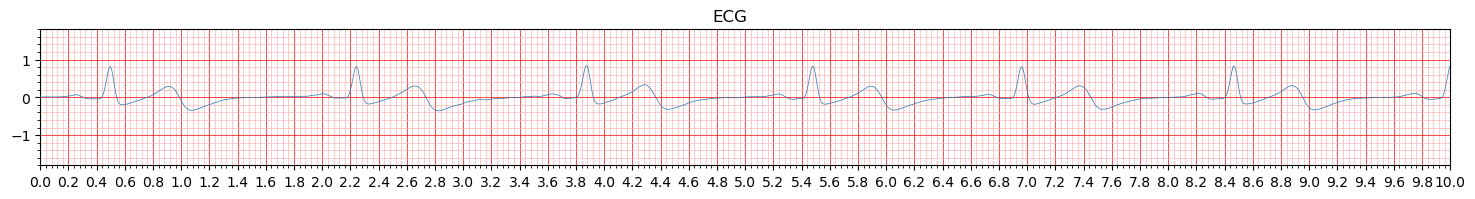

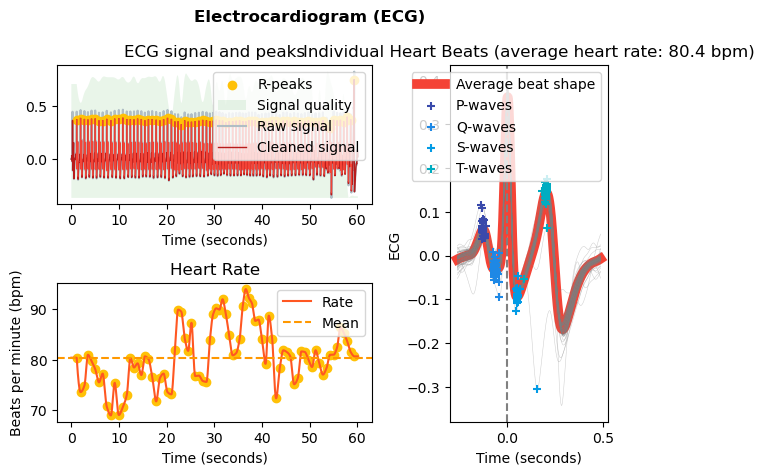

In [83]:
R2 = funcion_leer("basal/R2.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R2,"Basal DII")

#### DIII


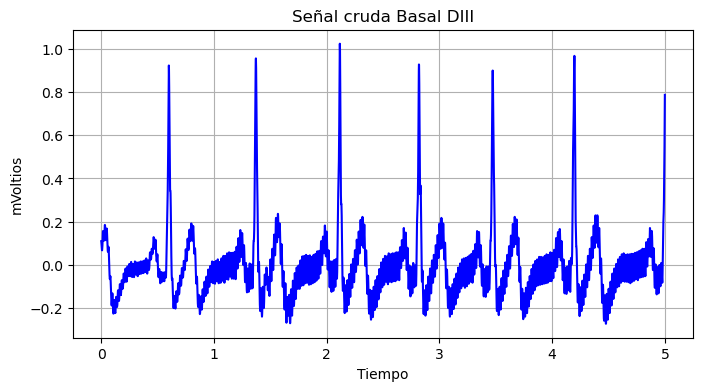

c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


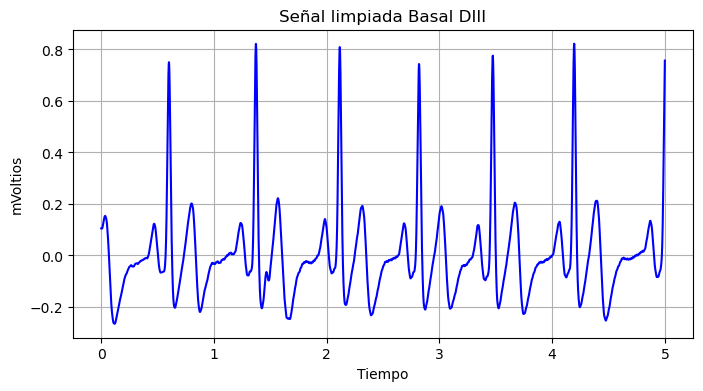

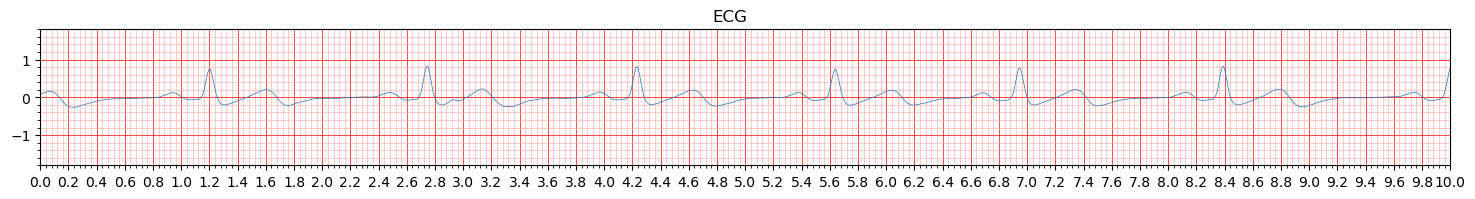

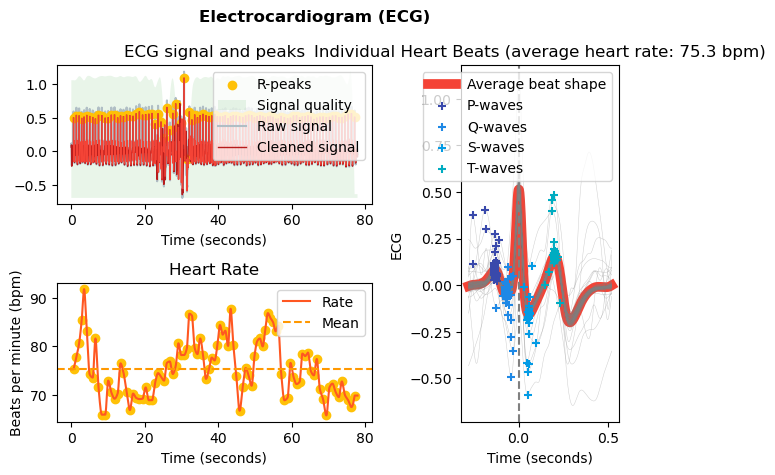

In [84]:
with open("basal/R3.txt","r") as basal_3:
    basal3 = obtener_dato_de_txt(basal_3)

#para convertir a mV
basal3_mv = convertir_a_mV(basal3)

report, signals, info = procesar_ecg(basal3_mv,"Basal DIII")


-  ### Aguntar la respiración 10 segundos

#### DI






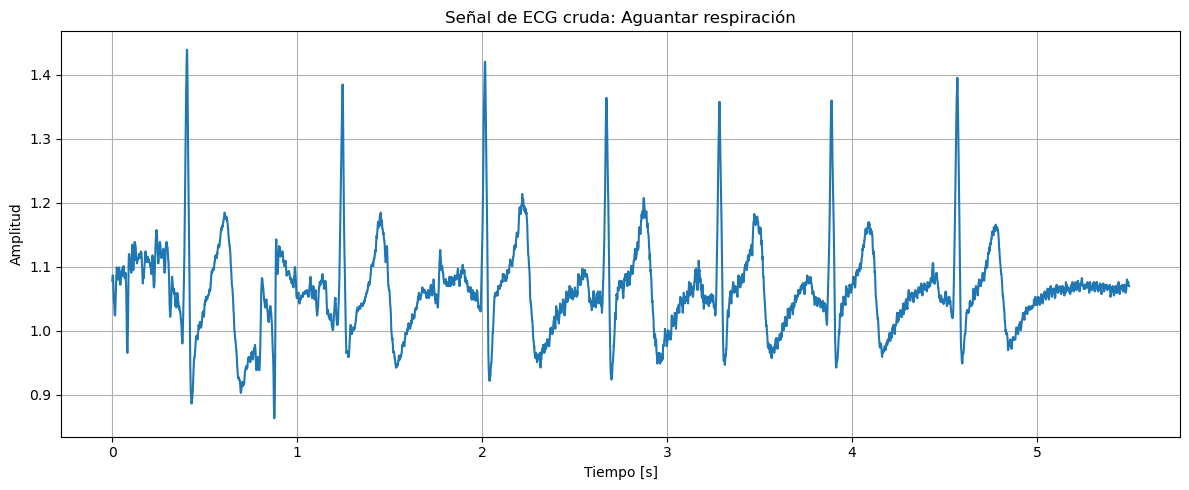

In [85]:
sample, amplitude = extraer_datos("mantener la respiración/derivada1.txt")
amplitude = amplitude*1.5/np.max(amplitude) #Primer escalamiento
grafica(sample[0:5500], amplitude[0:5500])

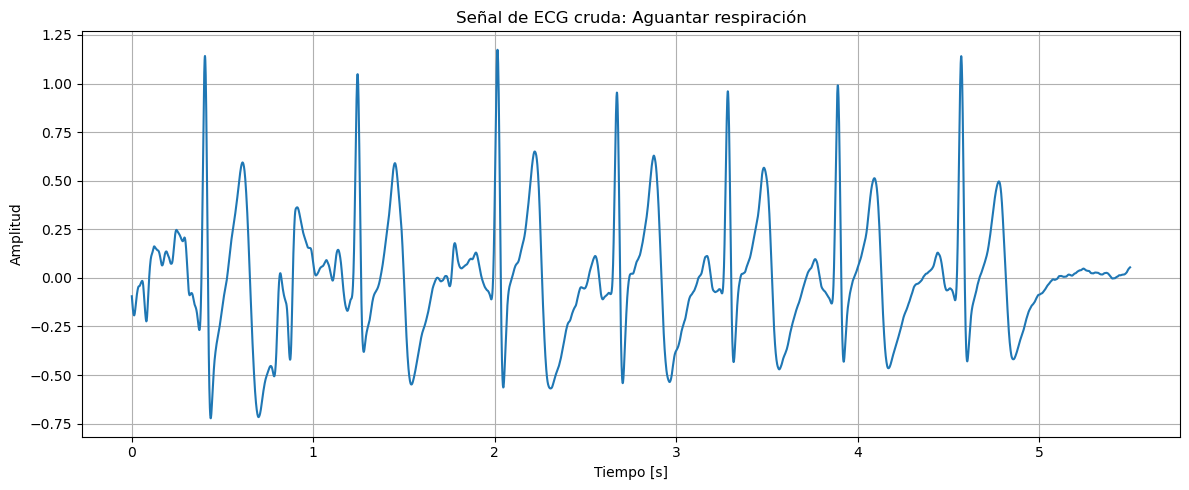

c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 1 del estado basal, el ritmo cardiaco promedio es de: 74 bpm


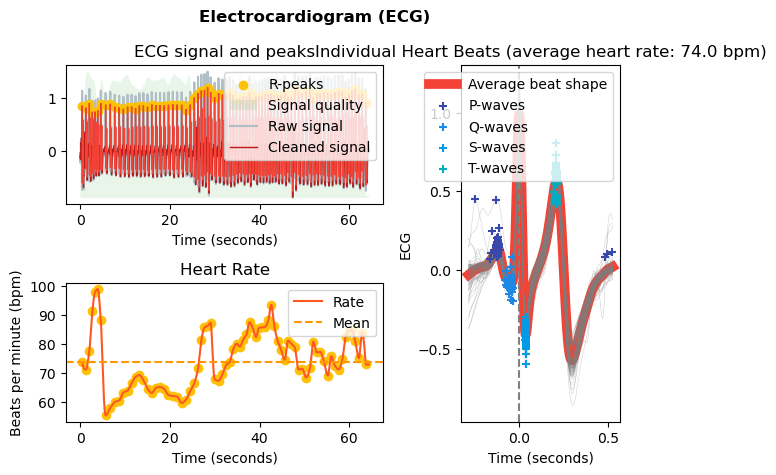

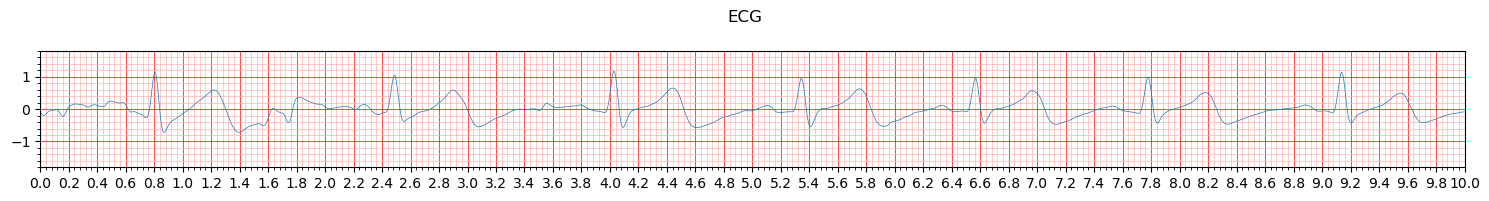

In [86]:
i = ecg_procesamiento(sample, amplitude)



#### DII





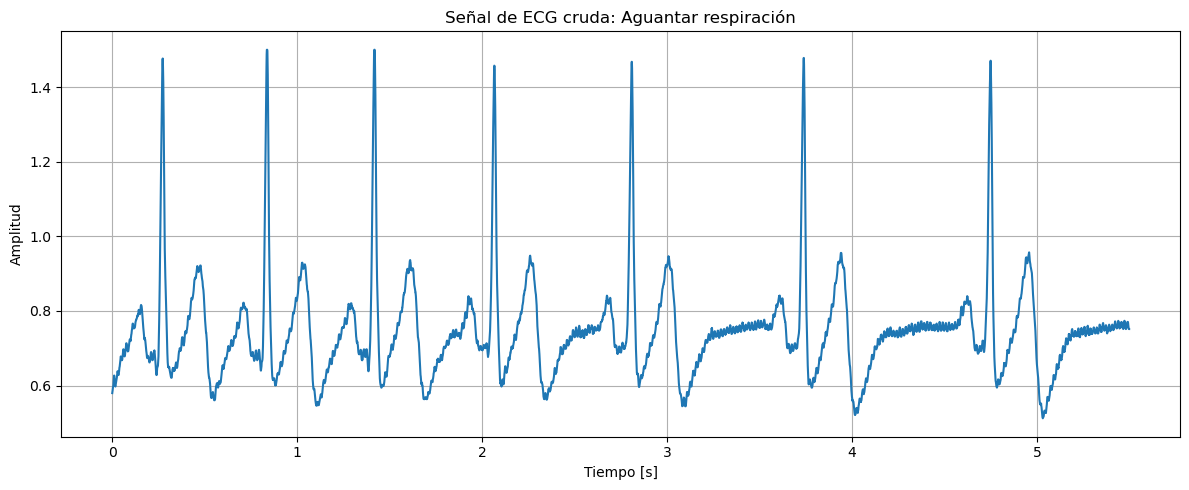

In [87]:
sample, amplitude = extraer_datos("mantener la respiración/derivada2.txt")
amplitude = amplitude*1.5/np.max(amplitude) #Primer escalamiento
grafica(sample[0:5500], amplitude[0:5500])

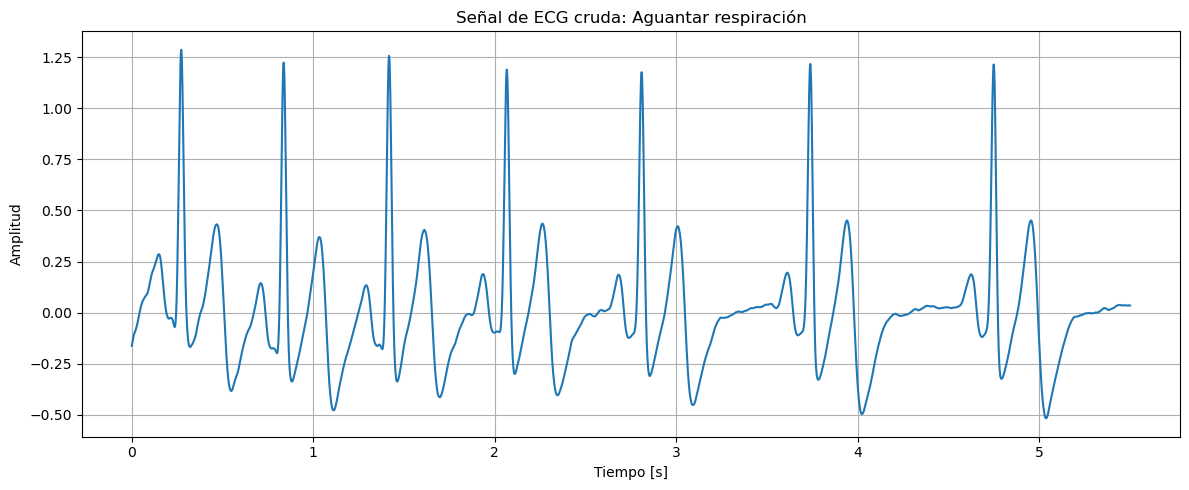

c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 2 del estado basal, el ritmo cardiaco promedio es de: 73 bpm


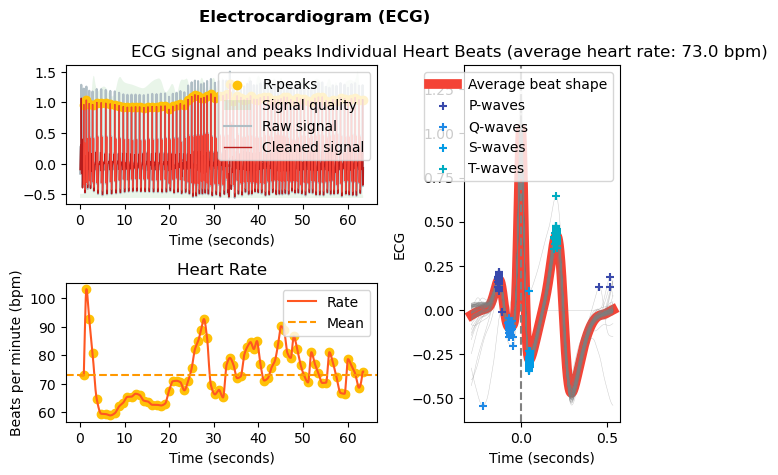

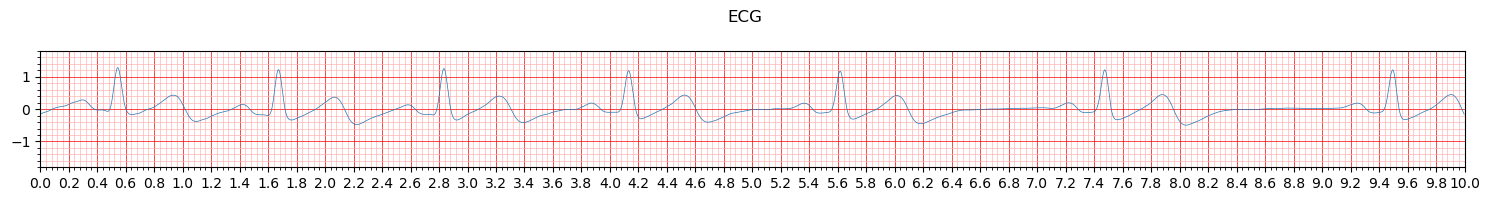

In [88]:
i = ecg_procesamiento(sample, amplitude, i)

#### DIII  

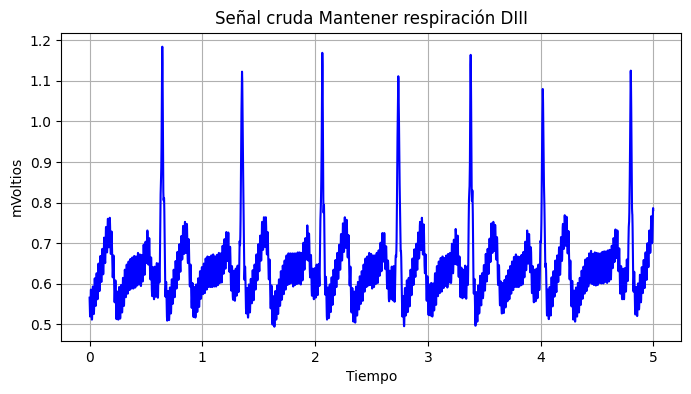

c:\Users\david\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


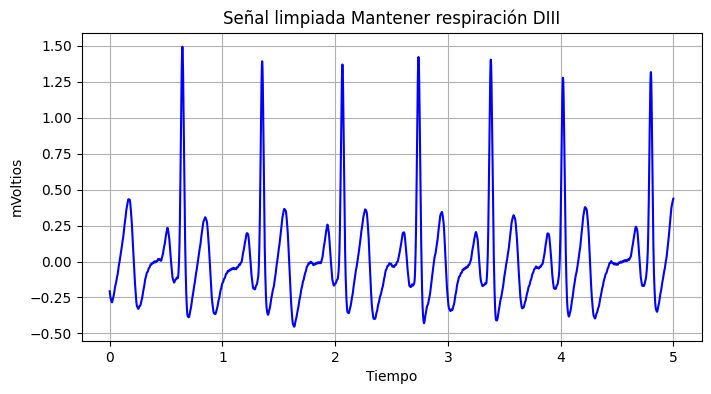

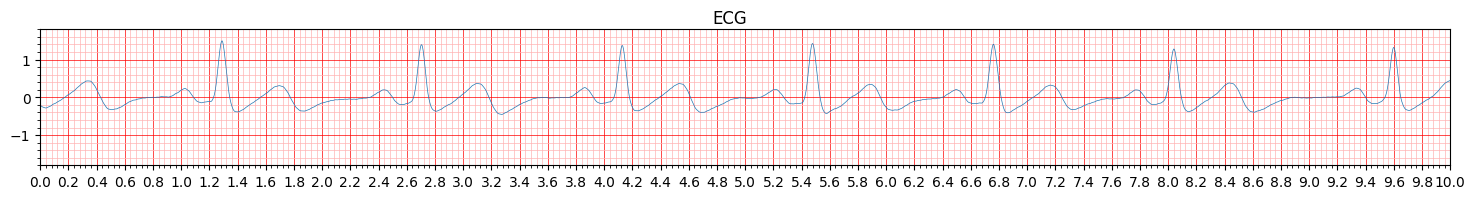

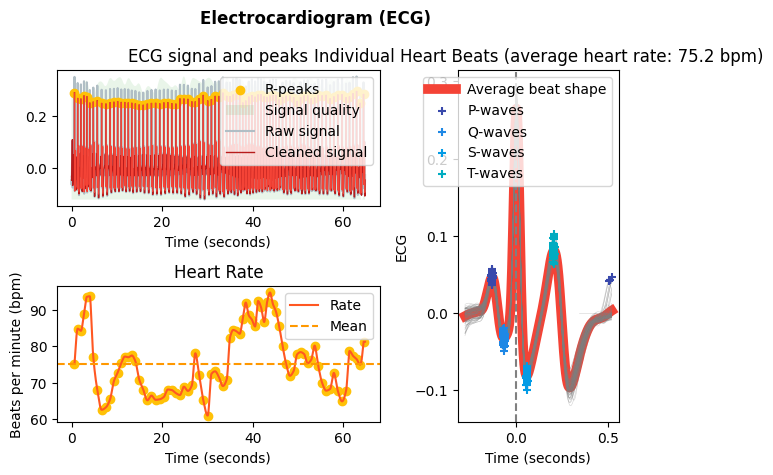

In [7]:
der3 = funcion_leer("mantener la respiración/derivada3.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(der3,"Mantener respiración DIII") 


-  ### Post ejercicio


#### DI





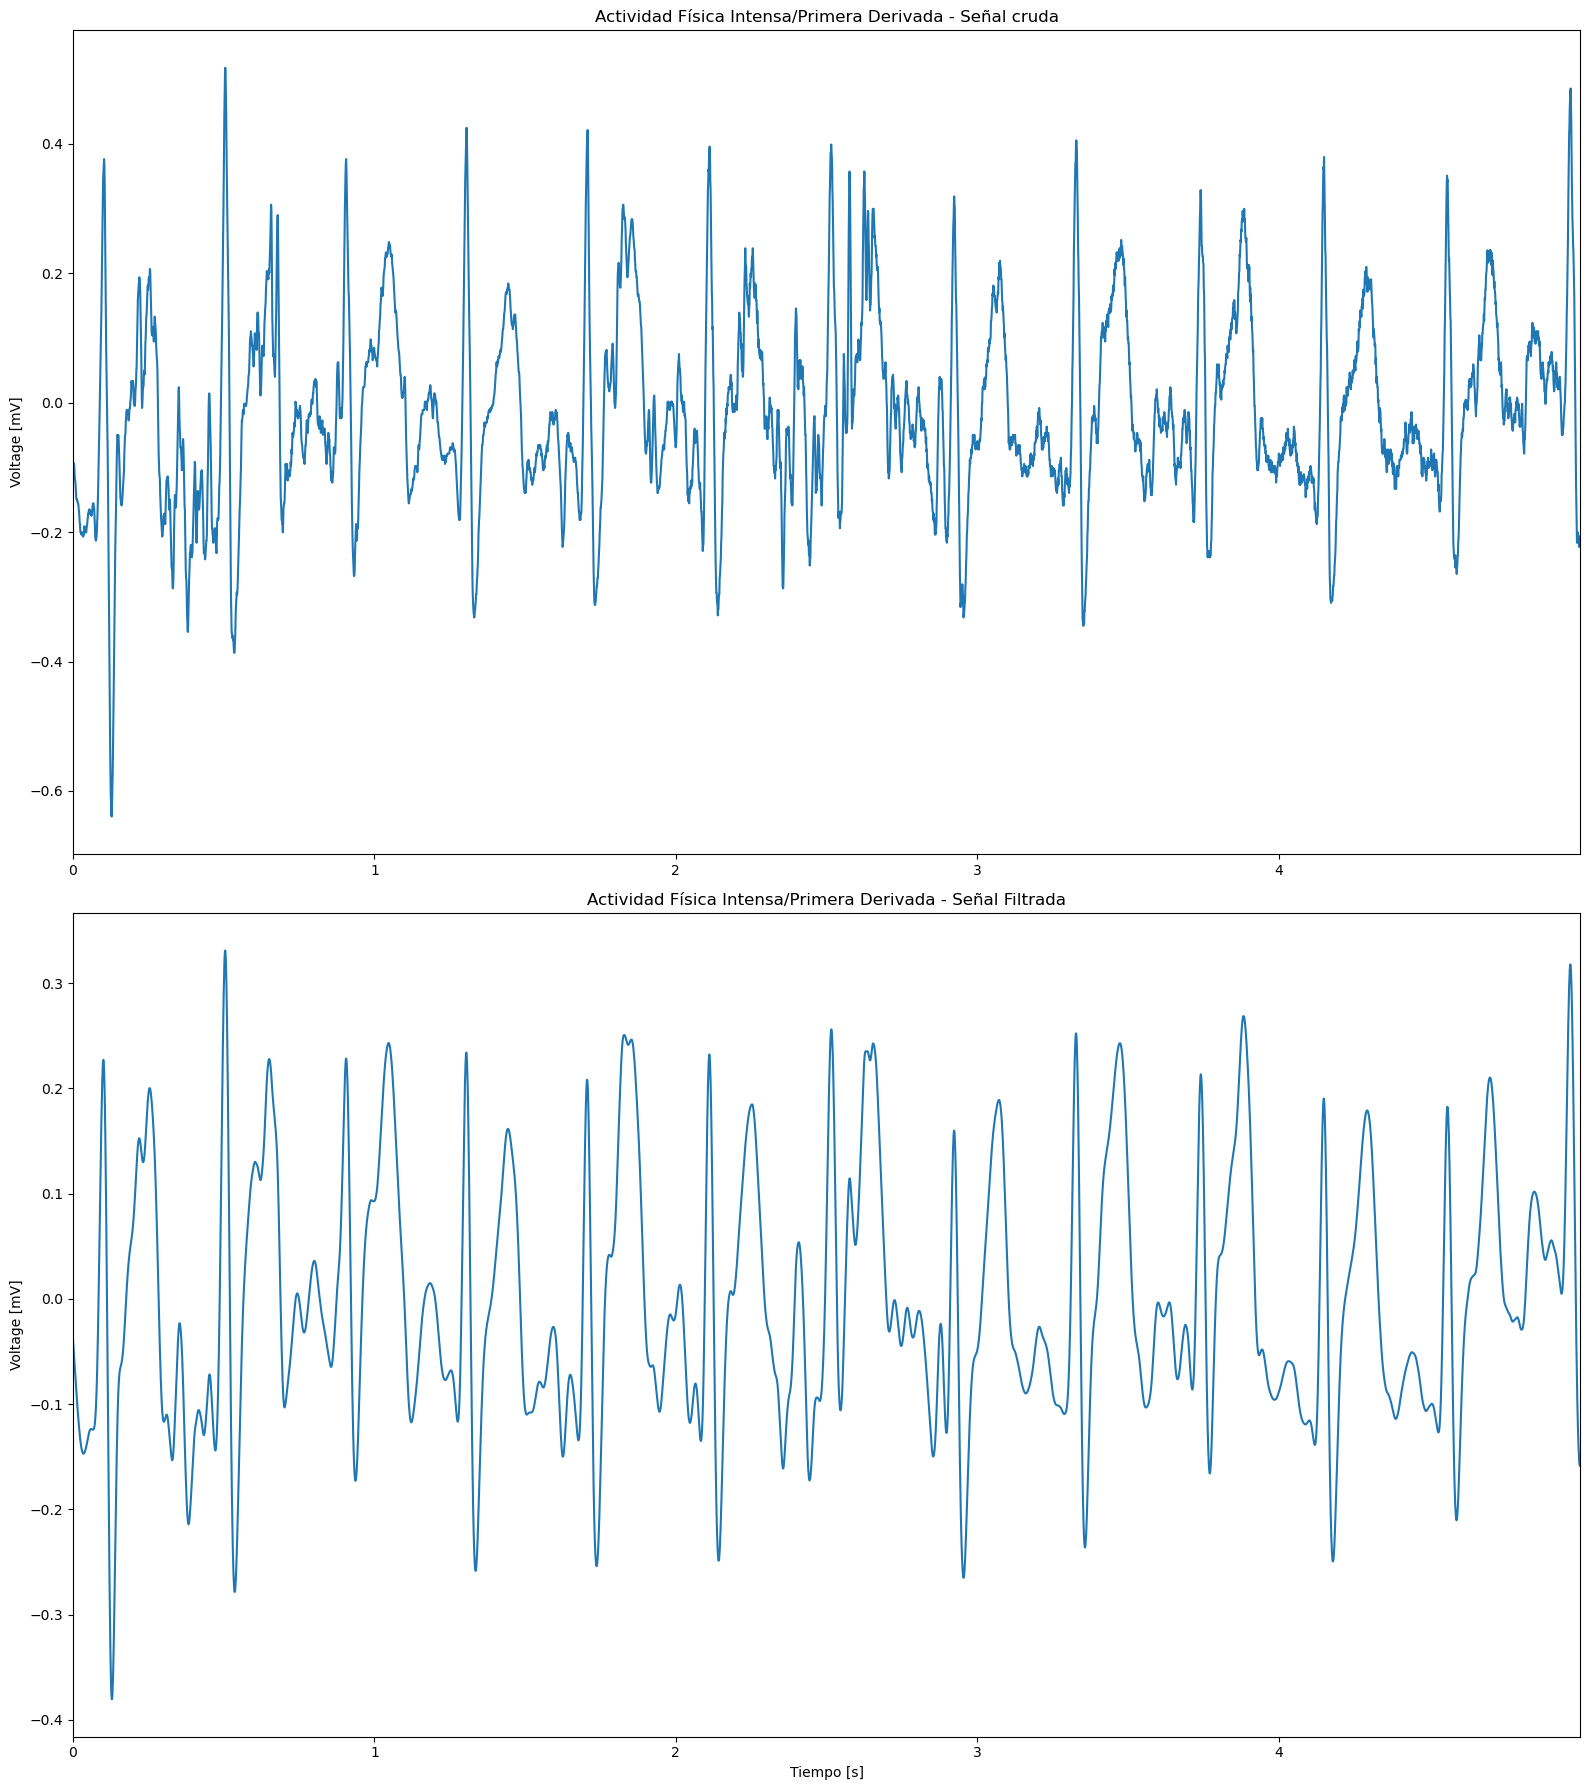

In [89]:
Fs=1000;
t1,ecgSignalD1=read("ejercicio/derivada1.txt",Fs)
ecgSignalD1=convertir_a_mV(ecgSignalD1)
clenSignalD1=nk.ecg_clean(ecgSignalD1,Fs)

plt.figure(figsize=(16,18))

plt.subplot(211)
plt.plot(t1[0:5000],ecgSignalD1[0:5000])
plt.ylabel('Voltage [mV]')
plt.title('Actividad Física Intensa/Primera Derivada - Señal cruda') 
plt.autoscale(True, axis='x', tight=True)

plt.subplot(212)
plt.plot(t1[0:5000],clenSignalD1[0:5000])
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltage [mV]')
plt.title('Actividad Física Intensa/Primera Derivada - Señal Filtrada') 
plt.autoscale(True, axis='x', tight=True)

plt.tight_layout()
plt.show()

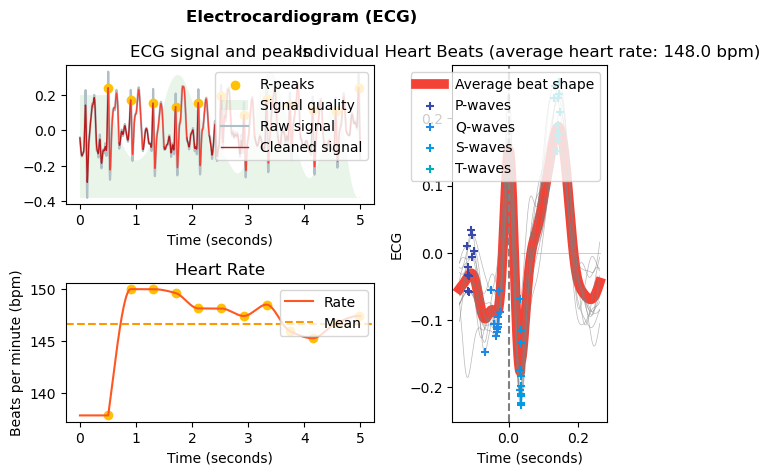

In [104]:
signalD1, infoD1 = nk.ecg_process(clenSignalD1, Fs)
nk.ecg_plot(signalD1[0:5000],infoD1)
plt.tight_layout()

In [91]:
ecg_analisisD1 = nk.ecg_analyze(signalD1, Fs)
print(ecg_analisisD1)

  ECG_Rate_Mean             HRV_MeanNN                HRV_SDNN HRV_SDANN1  \
0    137.885816  [[435.2325581395349]]  [[18.051999673234608]]    [[nan]]   

  HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0    [[nan]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   

               HRV_RMSSD  ...             HRV_SampEn             HRV_ShanEn  \
0  [[5.295947396220002]]  ...  [[1.127811443360372]]  [[5.264935650272711]]   

              HRV_FuzzyEn                HRV_MSEn               HRV_CMSEn  \
0  [[0.5737541641486706]]  [[0.6477128724530155]]  [[1.0768960433044041]]   

              HRV_RCMSEn                 HRV_CD                 HRV_HFD  \
0  [[1.077971366949744]]  [[1.672842420962544]]  [[1.6921755592894703]]   

                  HRV_KFD                 HRV_LZC  
0  [[1.6034980348065442]]  [[0.5230680614292406]]  

[1 rows x 83 columns]


c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


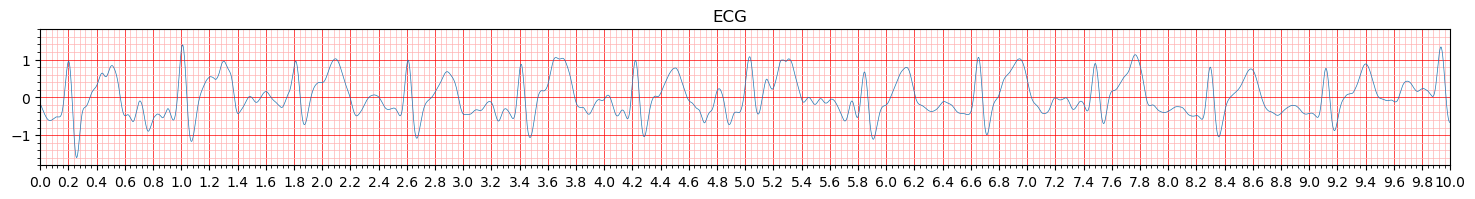

In [92]:
normalizeCleanSignal=np.array(clenSignalD1)/max(clenSignalD1)*1.5
ecg_plot.plot_1(normalizeCleanSignal[0:5000])



#### DII






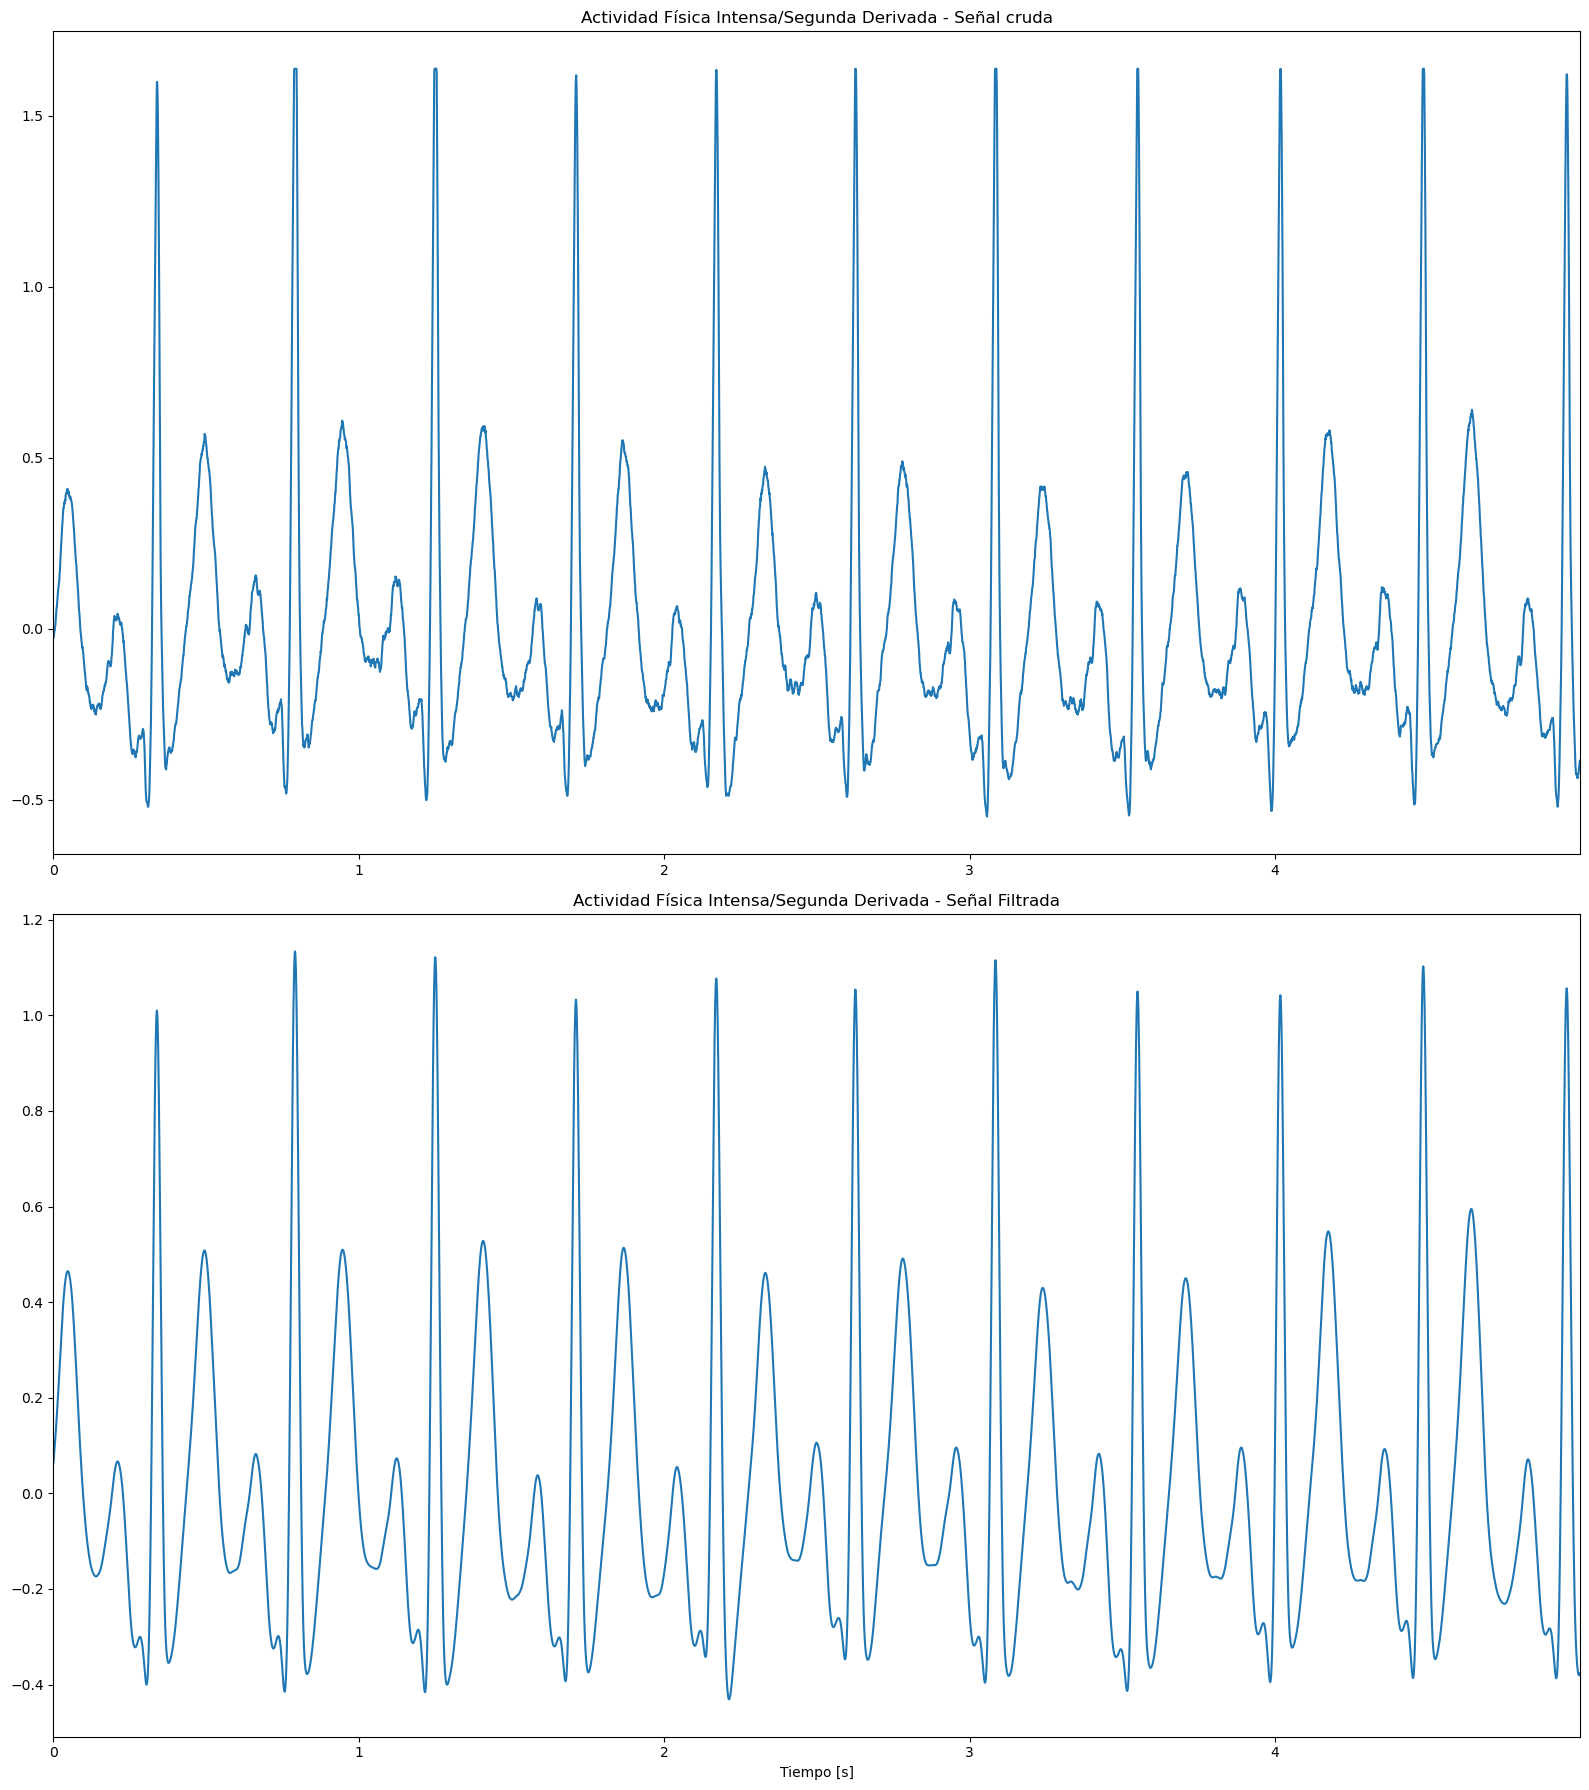

In [93]:
Fs=1000;
t2,ecgSignalD2=read("ejercicio/derivada2.txt",Fs)
ecgSignalD2=convertir_a_mV(ecgSignalD2)
clenSignalD2=nk.ecg_clean(ecgSignalD2,Fs)

plt.figure(figsize=(16,18))

plt.subplot(211)
plt.plot(t2[0:5000],ecgSignalD2[0:5000])
plt.title('Actividad Física Intensa/Segunda Derivada - Señal cruda') 
plt.autoscale(True, axis='x', tight=True)

plt.subplot(212)
plt.plot(t2[0:5000],clenSignalD2[0:5000])
plt.xlabel('Tiempo [s]')
plt.title('Actividad Física Intensa/Segunda Derivada - Señal Filtrada') 
plt.autoscale(True, axis='x', tight=True)

plt.tight_layout()
plt.show()

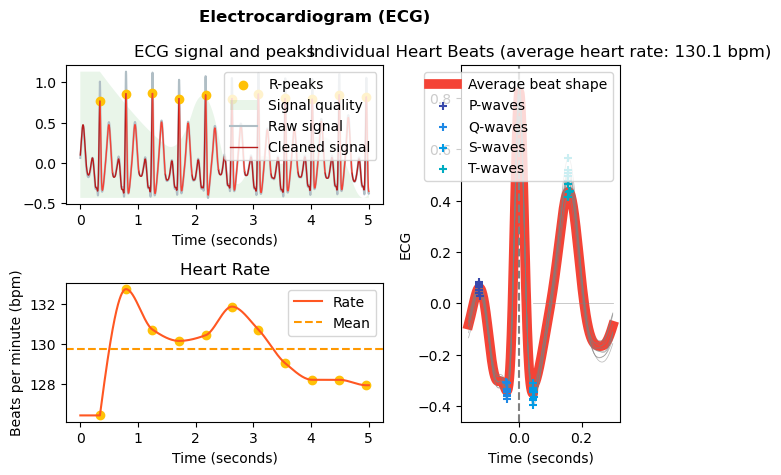

In [102]:
signalD2, infoD2 = nk.ecg_process(clenSignalD2, Fs)
nk.ecg_plot(signalD2[0:5000],infoD2)
plt.tight_layout()

In [95]:
ecg_analisisD2 = nk.ecg_analyze(signalD2, Fs)
print(ecg_analisisD2)

  ECG_Rate_Mean             HRV_MeanNN                HRV_SDNN HRV_SDANN1  \
0    126.420426  [[474.6046511627907]]  [[12.949929883768792]]    [[nan]]   

  HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0    [[nan]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   

               HRV_RMSSD  ...              HRV_SampEn             HRV_ShanEn  \
0  [[4.483958335326186]]  ...  [[1.1411719030869056]]  [[4.943438667810566]]   

              HRV_FuzzyEn               HRV_MSEn               HRV_CMSEn  \
0  [[0.7562283746967593]]  [[0.749532293143783]]  [[0.8809783971404622]]   

               HRV_RCMSEn                  HRV_CD                HRV_HFD  \
0  [[0.8539060966908456]]  [[1.6804413616461877]]  [[1.450164354785806]]   

                  HRV_KFD                 HRV_LZC  
0  [[1.8926554737845873]]  [[0.5230680614292406]]  

[1 rows x 83 columns]


c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


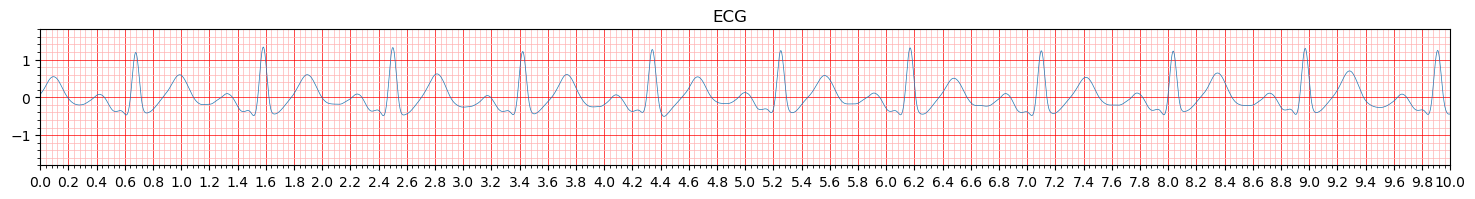

In [96]:
normalizeCleanSignal=np.array(clenSignalD2)/max(clenSignalD2)*1.5
ecg_plot.plot_1(normalizeCleanSignal[0:5000])




#### DIII



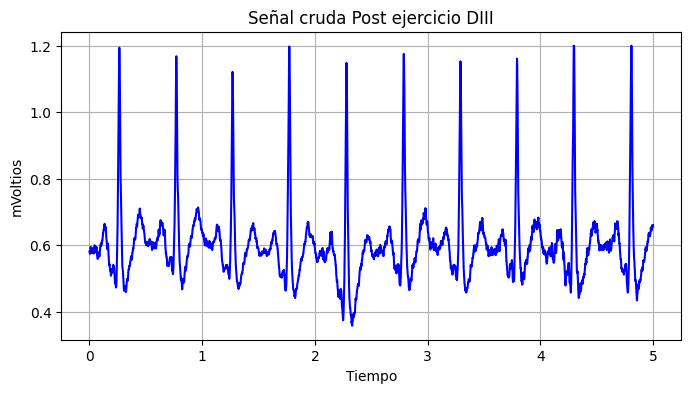

c:\Users\david\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


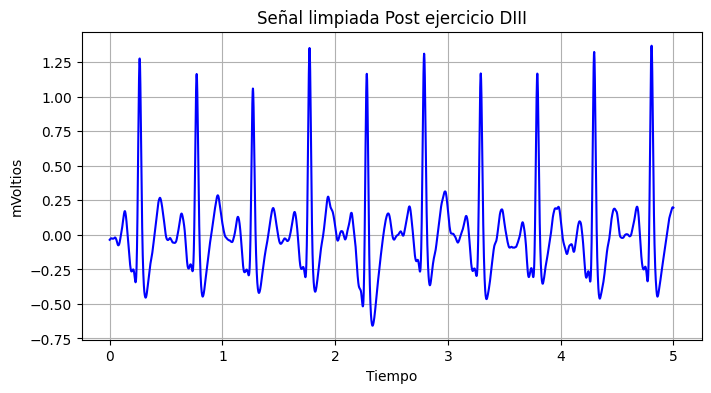

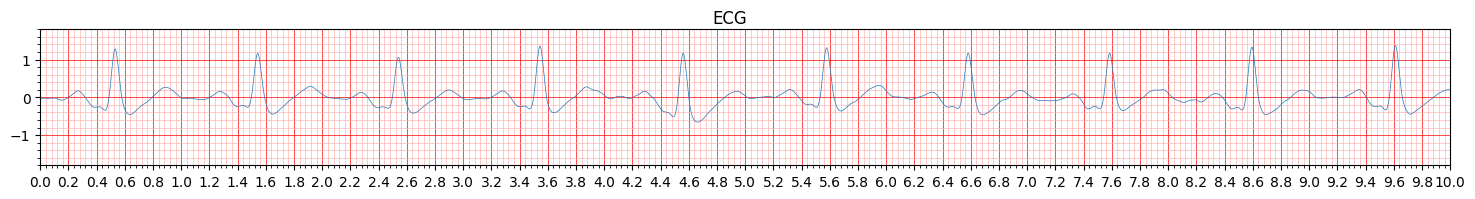

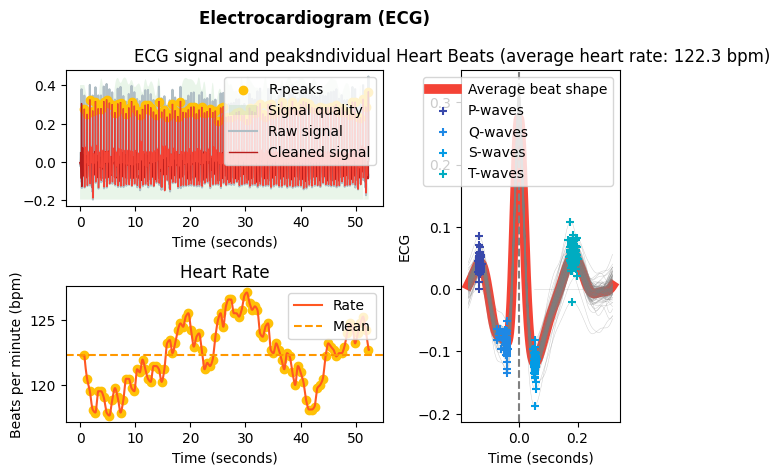

In [8]:
derivada3 = funcion_leer("ejercicio/derivada3.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(derivada3,"Post ejercicio DIII") 

## **Discusión**

### Derivada I
<div align="left">
  <img src="imagenes/derivada1/derivada1_basal.png" width="32%" style="display: inline-block;">
  <img src="imagenes/derivada1/derivada1_respiracion.png" width="32%" style="display: inline-block;">
  <img src="imagenes/derivada1/derivada1_ejercicio.png" width="32%" style="display: inline-block;">

  <p style="text-align: center;"><strong>Figura X: Comparación de características entre primeras derivadas (de izquierda a derecha: Basal, Aguantando respiración y Post-ejercicio)</strong></p>
</div>
<br>

Procederemos a discutir los resultados para la primera derivada del estado basal, aguantar la respiración y post-ejercicio, enfocandonos en tres aspectos particulares: bpm, las gráficas de HRV y finalmente la gráfica que nos muestra la forma promedio del latido. Vemos que para el estado basal y de aguantar la respiración, se obtuvieron valores de bpm prácticamente iguales, lo cuales de igual manera se encuentran dentro del rango esperado para un estado en reposo [A1]. Respecto al bpm obtenido post-ejercicio, el valor elevado que se obtuvo también era esperado debido a la mayor activación muscular y demanda energética que implica la actividad física.

Por el lado del HRV del estado basal y deaguantar la respiración, si bien en los primeros segundos parece haber una variación similar, al menos desde el aspecto visual de la gráfica, vemos que aumenta la frecuencia de oscilación de la derivada de aguantar la respiración durante los últimos segundos. De igual manera, a diferencia de la gráfica de HRV para basal, la de aguantar respiración parece mostrar una tendencia positiva. Esto esta relacionado a la respuesta del sistema nervioso al estado inducido de apnea. En condiciones de falta de oxígeno, se ha visto que el corazón tiende a aumentar la frecuencia cardíaca [A2], lo que implica un esfuerzo adicional que el cuerpo realiza para manejar la acumulación de dióxido de carbono y la necesidad de oxígeno a nivel del músculo cardíaco. Este esfuerzo adicional es a lo que puede deberse la oscilación que se da a gran medida en los momentos finales del HRV de aguantar la respiración. De igual manera, si bien el aumento esperado de la frecuencia cardíaca no se ve reflejado en el bpm promedio como tal, si se puede apreciar en la grafica del HRV tiende con el paso del tiempo a valores más altos que el HRV del estado basal. Este hecho, sumado a que para el HRV de aguantar la respiración tenemos que la gráfica comienza en valores mucho menores al del estado basal, explican porque el bpm promedio es igual. En el caso del HRV del estado post-ejercico, si bien vemos valores mucho más elevados, también se aprecia un descenso pronunciado en los látidos por minuto. Esto esta relacionado con los hallazgos de estudios realizados acerca de la frecuencia cardíaca tras la actividad física, donde se reporto que tras el ejercicio la frecuencia cardíaca disminuye hasta un 38% del valor máximo de bpm durante el primer minuto [A3]. De igual manera, la oscilación del HRV para el estado post-ejercicio parece seguir un patrón ordenado en nuestros resultados durante su disminución. Esto esta relacionado al hecho de que, a medida que se da la etapa de recuperación tras el ejercicio, existe una reactivación del sistema parasimpático al igual que una retirada del simpático, ambos ocurriendo de manera lenta y progresiva [A4], reflejando estos ajustes automáticos lentos en el HRV como este patrón oscilatorio ordenado.

Finalmente, respecto a la forma promedio del latido, vemos que en realidad las formas para el estado basal y de aguantar la respiración son muy similares si no identicas. De igual manera, la distribución de los puntos que representan las ondas P, Q, S y T presentan alta precisión: todos los puntos se encuentran alrededor de un mismo sitio. Esto se debe a que en estos dos estados el ECG que se visualiza en la primera derivada sigue un patrón relativamente ordenado y notoriamente periódico, por lo que da pie a que no existan muchos valores ext0.remos/outsiders. De igual manera, la duración temporal de la forma promedio para estos dos estados es similar, correspondiendo a la esperada en estados donde no se da actividad física: ∼0.8 s [A5]. Para la forma promedio post-ejercicio, destacan dos características en particular: la elevada onda T y la corta duración temporal de la forma promedio del latido. Respecto a la duración, esto es de esperarse. El venir de un estado de actividad física continua implica una mayor frecuencia cardíaca, implicando así más bpm. Esto significa que tenemos más ciclos cardiacos en la misma ventana de tiempo (1 minuto), por lo que la duración de los ciclos se reduce para que se den más en esta ventana. Esta reducción se da debido a que se acortan partes de la señal de ECG, como lo son los intervalos R-R [A6]. Por otro lado, justo después de la actividad física la amplitud de la onda T incrementa [A7], lo cual va de la mano con la forma de las ondas T que obtuvimos para el estado post-ejercicio.


### Derivada II:


La segunda derivada (DII) evalua la rapidez de los cambios en la actividad eléctrica cardíaca, especialmente en el complejo QRS. En esta derivada, la actividad eléctrica del corazón se proyecta de manera frontal hacia el electrodo, facilitando una visualización clara de los cambios en la polarización ventricular. La diferencia de potencial se mide entre el brazo derecho y la pierna izquierda en un ángulo de 60°, proporcionando una perspectiva precisa de la actividad cardíaca.

En la condición basal, la señal de la derivada DII muestra un ritmo cardíaco regular, con una frecuencia promedio de 80.4 BPM. La morfología de la señal es consistente y uniforme, lo cual sugiere una contracción cardíaca estable y eficiente en ausencia de estrés o factores externos. La estabilidad de los picos R y la uniformidad en los intervalos R-R reflejan un equilibrio en la regulación autonómica, indicando una activación equilibrada del sistema nervioso simpático y parasimpático. En esta condición, la fuerza de contracción cardíaca se mantiene constante, como lo sugiere la amplitud de los picos, y la señal es representativa del estado de reposo.

Durante la contención de la respiración, se observa una ligera disminución en la frecuencia cardíaca, alcanzando un promedio de 73 BPM. Esta reducción se explica por el aumento en el tono vagal, que es la actividad del nervio vago dentro del sistema nervioso parasimpático, encargado de regular funciones involuntarias en el cuerpo, incluyendo la frecuencia cardíaca. Al retener la respiración, el tono vagal aumenta, lo que provoca una reducción en la frecuencia cardíaca como mecanismo de adaptación. En el ECG, esta respuesta se observa claramente entre los tiempos [10, 20] segundos, donde la frecuencia cardíaca es mínima.
Una vez que el individuo vuelve a respirar, la frecuencia cardíaca se estabiliza, regresando gradualmente al ritmo basal. La amplitud de los picos en esta condición no presenta variaciones significativas respecto al estado basal, lo que sugiere que la fuerza de contracción cardíaca permanece constante. Esto refleja que, aunque hay un cambio en la modulación del sistema nervioso autónomo, la capacidad de contracción no se ve afectada. La morfología de la señal permanece estable, lo cual es característico de una reducción en la frecuencia cardíaca sin cambios en la estructura del complejo QRS.

En la condición de ejercicio intenso, la señal en la derivada DII muestra intervalos R-R más cortos, lo cual se traduce en una frecuencia cardíaca elevada, con un promedio de 130.1 BPM. Este aumento se debe a la respuesta del sistema cardiovascular ante una mayor demanda de oxígeno y nutrientes en los tejidos durante la actividad física. En respuesta a esta necesidad, el sistema nervioso simpático incrementa tanto la frecuencia como la fuerza de contracción cardíaca. Esto se observa en el ECG mediante una mayor frecuencia de picos R y un leve aumento en la amplitud de los picos, lo que indica una contracción más vigorosa de los ventrículos. En cuanto a la morfología de la señal, se observan sutiles diferencias en el complejo QRS durante el ejercicio intenso. Estas variaciones pueden estar relacionadas con el aumento en la velocidad de conducción y el flujo sanguíneo, propios de una actividad física intensa. Aunque la estructura general de la señal se mantiene, las pequeñas alteraciones reflejan la adaptación del corazón a la carga de trabajo adicional.

### Derivada III:  
<div align="justify">
Analizando las derivadas biopolares o de Einthoven, enfocándonos en la tercera derivada (DIII), en una persona sana, se esperaría obtener en el electrocardiograma:
</div>

<div align="justify">

* Onda P positiva [C1] [C2]
* Complejo QRS, en promedio, positiva [C3], aunque también puede haber bifásica [C4]
* Onda T variable [C1], es decir, puede tener morfología tanto positiva como negativa o isodifásica [C4]
</div>
<br>
<div align="center">
  <img src="./imagenes/derivada3/EKG_ECG.png" alt="EKG_myEKG" height="300">
  <img src="./imagenes/derivada3/ECG_casasco.png" alt="EKG_casasco" height="300">
  <p>

  **Figura XXXXXX: Ritmo sinusal a 72 lpm (izquierda) [C2] y electrocardiograma normal (derecha) [C4], ambos ECG son de pacientes sanos**
  </p>
</div>

<br>
<div align="center">
<p align="justify">Ahora, tomando en cuenta los resultados obtenidos en cada actividad realizada, tal y como se muestra en la siguiente tabla: </p>

| En basal | Sosteniendo respiración (temporal) | post-ejercicio (temporal)|  
|:------:|:------------------------:|:-----------:|  
|<img src="./imagenes/derivada3/basal3.png" alt="basal" width="400">|<img src="./imagenes/derivada3/respiracion3.png" alt="respiracion" width="400">|<img src="./imagenes/derivada3/ejercicio3.png" alt="ejercicio" width="400">|
</div>

<div align="justify">  
Para el caso del basal (estado en reposo y respiración tranquila), se ha obtenido una frecuencia cardiaca de 75.3 latidos por minuto, lo que está dentro del rango esperado: 50 a 90 latidos por minuto, salir de este rango implicaría tener problemas de salud, como inflamación subclínica, tono simpático alto, enfermedades cardiovasculares, entre otros [C5].  <br>
  
Para el caso de sostener la respiración, se obtuvo una frecuencia cardiaca de 75.2 latidos por minuto, lo que es muy cercano al del estado basal. Según estudios, el cambio de la frecuencia cardiaca, debido a la contención de la respiración, no es estadísticamente significativo (P>0.05), pero sí lo es para parámetros como la presión de CO2, presión de O2, saturación de oxígeno y la variabilidad de la frecuencia cardiaca (HRV), para este último, por ejemplo, hay un descenso del SDNN y del RMSSD (relacionados a la actividad general del sistema autonómico y parasimpática, respectivamente) [C6]. No hay que confundir con el reflejo de apnea de inmersión, en la que se sostiene la respiración y sí ocurre la reducción de la frecuencia cardiaca. Cabe aclarar que, para este caso, el cuerpo (específicamente el rostro, debido a la localización de los trigéminos) debe estar sumergido en agua, particularmente en agua fría [C7]. Por tanto, al sostener la respiración (no sumergido en agua) no necesariamente se debería esperar un descenso de la frecuencia cardiaca.  <br>

Para el caso de realizar ejercicio físico, se ha obtenido una frecuencia cardiaca de 122.3 latidos por minuto, esto es considerado dentro del rango ideal. Cabe destacar que el rango ideal para el ejercicio de intensidad moderada debe ser de 50% al 70% de la frecuencia cardiaca máxima, esta última está determinada por la resta entre 220 menos la edad del paciente. Considerando esto, se esperaría obtener una frecuencia cardiaca dentro del rango de 99 a 138.6 latidos por minuto [C8].
</div>

<div align="justify">
Ahora, analizando la morfología (promedio) del ECG (DIII) por cada actividad, se tiene una onda P positiva (de baja amplitud), un complejo QRS positivo y una onda T positiva, morfología dentro de lo esperado para una persona sana. Un aspecto que cabe destacar es la variabilidad y/o precisión de los datos, comparados al valor promedio. Por ejemplo, en el reposo, los datos tienen más variabilidad si lo comparamos con las actividades. De acuerdo a un estudio realizado, se tiene que las personas en reposo tiene un mayor valor de SDNN (Standar deviation of normal to normal intervals, la cual, está relacionado a la variabilidad en los intervalor R-R [esta última está relacionada a la frecuencia cardiaca]) y este disminuye si la persona realiza ejercicio físico (sea ligero, moderado [en la que se registra menor valor] o vigoroso) [C9]. Por lo tanto, es de esperarse tener una mayor variabilidad de la frecuencia cardiaca en el estado basal.  <br>
<br>
Asimismo, no se visualiza la presencia de patologías, por ejemplo, de cadiomiopatías hipertróficas (la amplitud IIIQ+S no es mayor a 1mV)[C10], no parece haber alteración de la aurícula derecha (la onda P no es alta ni picuda) y no parece haber presencia de hemibloqueo anterior izquierdo (una característica es la presencia de rS en el complejo QRS, como se ve en la tabla inferior; sin embargo, en los datos obtenidos el complejo es de la forma qRs) [C1].
</div>

<div align="center">

|  rS | qRs|
|:------:|:------------------------:|
|<img src="./imagenes/derivada3/rS.png" alt="rS" width="200">|<img src="./imagenes/derivada3/qRs.png" alt="qRs" width="200">|
<p aling="center"> Tabla XXXX: Morfologías del complejo QRS [C11] </p>
</div>

## Bibliografía 

[1] https://www.tandfonline.com/doi/full/10.1080/03091902.2018.1492039  
[2] https://www.redalyc.org/pdf/849/84920503016.pdf  
[3] https://neuropsychology.github.io/NeuroKit/functions/ecg.html  
[A1] https://www.sciencedirect.com/science/article/abs/pii/S1050173822000731  
[A2] https://www.iomcworld.com/open-access/cardiovascular-response-to-breathholding-explained-by-changes-of-theindices-and-their-dynamic-interactions-2329-6577-1000152.pdf  
[A3] https://www.scielo.br/j/bjmbr/a/7mmq5FLwxcxKSJJx6Ns55cx/?lang=en&format=html&stop=next  
[A4] https://www.frontiersin.org/journals/physiology/articles/10.3389/fphys.2017.00301/full  
[A5] https://pmc.ncbi.nlm.nih.gov/articles/PMC3577223/   
[A6] https://www.spandidos-publications.com/10.3892/etm.2016.3104#:~:text=Of%20note%2C%20during%20the%20onset,and%20after%20training%20(21).  
[A7] https://academic.oup.com/cardiovascres/article-abstract/6/2/143/468742?redirectedFrom=fulltext  

[C1] L. Díaz et al., “Electrocardiografía básica. Realización e interpretación de un ECG”. Disponibble: https://medicina.ucm.es/data/cont/media/www/pag-17227/Electrocardiografía%20Básica.pdf 

[C2]“Ondas del Electrocardiograma”. Disponible en: https://www.my-ekg.com/generalidades-ekg/ondas-electrocardiograma.html.

[C3]C. Nagel, N. Pilia, A. Loewe, y O. Dössel, “Quantification of Interpatient 12-lead ECG Variabilities within a Healthy Cohort”, Current Directions in Biomedical Engineering, vol. 6, núm. 3, pp. 493–496, sep. 2020, doi: 10.1515/cdbme-2020-3127. Disponible en: https://www.degruyter.com/document/doi/10.1515/cdbme-2020-3127/html.

[C4] Revista Digital, Curso de Interpretación de Electrocardiogramas, Fascículo 1, [En línea]. Disponible: https://www.casasco.com.ar/wp-content/uploads/2015/11/Fasciculos-ECG-RevistaDigital-1.pdf.

[C5] D. Nanchen, “Resting heart rate: what is normal?”, Heart, vol. 104, núm. 13, pp. 1048–1049, jul. 2018, doi: 10.1136/heartjnl-2017-312731. Disponible en: https://heart.bmj.com/content/104/13/1048.

[C6] B. Bhandari, M. Mavai, Y. R. Singh, B. Mehta, y O. Bhagat, “Rhythmic Breath Holding and Its Effect on Arterial Blood Pressure and Its Correlation With Blood Gases”, Acta Medica Iranica, pp. 492–498, 2019, doi: 10.18502/acta.v57i8.2425. Disponible en: https://acta.tums.ac.ir/index.php/acta/article/view/7687.  

[C7] “Qué es Reflejo de Inmersión. Diccionario Médico. Clínica U. Navarra”, https://www.cun.es. Disponible en: https://www.cun.es/diccionario-medico/terminos/reflejo-inmersion.
  
[C8] “Ejercite su corazón: MedlinePlus enciclopedia médica”. Disponible en: https://medlineplus.gov/spanish/ency/patientinstructions/000763.htm.  

[C9] C.-K. Chen, S.-L. Lin, C.-Y. Huang, T.-C. Wang, T.-Y. Yao, y C.-L. Wu, “Statistical Analysis on Heart Rate Variability for Graded Cardiopulmonary Groups with Different Exercise Intensities”, J. Med. Biol. Eng., vol. 40, núm. 3, pp. 440–450, jun. 2020, doi: 10.1007/s40846-020-00514-x. Disponible en: https://doi.org/10.1007/s40846-020-00514-x.   

[C10] A. S. Chen et al., “Large Q and S waves in lead III on the electrocardiogram distinguish patients with hypertrophic cardiomyopathy from athletes”, Heart, vol. 104, núm. 22, pp. 1871–1877, nov. 2018, doi: 10.1136/heartjnl-2017-312647. Disponible en: https://heart.bmj.com/content/104/22/1871.  

[C11] “Morfologias del Complejo QRS en el Electrocardiograma”. Disponible en: https://www.my-ekg.com/generalidades-ekg/morfologia-complejo-qrs.html.

## Anexos  

### Función para leer datos Bitalino (Basal 1 y Basal 2)

In [2]:
# Función para leer el archivo de texto y extraer la señal de ECG
import pandas as pd
import numpy as np
def funcion_leer(nombre):
    # Leer el archivo
    with open(nombre, 'r') as file:
        # Saltar las líneas de encabezado hasta que termine el EndOfHeader
        while True:
            line = file.readline()
            if "EndOfHeader" in line:
                break
        
        # Cargar los datos en un DataFrame
        data = pd.read_csv(file, delimiter='\t', header=None)
        
    # Seleccionar solo la quinta columna (índice 4 ya que Python empieza desde 0)
    columna_5 = data.iloc[:, 5]
    # Convertir la columna a un array de NumPy
    array_np = np.array(columna_5)
    return array_np

### Función para leer datos Bitalino y convertir a mV (Basal 3)

In [3]:
import numpy as np
def convertir_a_mV(dato,N_bits=10,valor_minimo=-1.64,valor_máximo=1.64):
    llaves = list(range(0,2**N_bits))
    valores = np.linspace(valor_minimo, valor_máximo, len(llaves))
    dic_valores = dict(zip(llaves,valores))
    
    #para crear una lista directamente, con elementos 0
    data_convertido = np.zeros(len(dato))
    indice = 0
    for valor in dato:
        data_convertido[indice] = dic_valores.get(int(valor), 0)
        indice += 1
    return data_convertido


#Función para obtener datos del TXT
def obtener_dato_de_txt(archivo):
    datos = []
    marcador = False
    #empezar la lactura de los txt
    for linea in archivo: #por cada línea
        if marcador: #recién adjuntará datos al ser verdadero
            datos.append(linea.rstrip().split("\t")[5])
        elif linea.rstrip() == "# EndOfHeader":  #marcador será verdadero a partir la línea esa
            marcador = True
    return datos

### Función para plotear ECG y analizarla (Basal 1 y Basal 2)


In [4]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import ecg_plot


def procesar_ecg(signal_raw, nombre,sampling_rate=1000,max_voltage=1.5,rango1=0,rango2=5000):
    # Escalar la señal cruda al rango de 0 a 1.2 V
    signal_scaled = (signal_raw / max(signal_raw)) * 1.2
    plt.figure(figsize=(8,4))

    plt.plot((np.arange(len(signal_scaled))/1000)[rango1:rango2],signal_scaled[rango1:rango2],"b")
    plt.title(f"Señal cruda {nombre}")
    plt.xlabel("Tiempo")
    plt.ylabel("mVoltios")
    plt.grid()
    plt.show()

    # Limpiar la señal
    signal_cleaned = nk.ecg_clean(signal_scaled, sampling_rate=sampling_rate)

    # Verificar si la señal limpiada tiene longitud válida
    if len(signal_cleaned) > 0:
        # Procesar la señal
        signals, info = nk.ecg_process(signal_cleaned, sampling_rate=sampling_rate)
        
        # Analizar la señal
        report = nk.ecg_analyze(signals, sampling_rate=sampling_rate)

        # Escalar la señal limpiada a un nuevo voltaje máximo (1.5 V en este caso)
        signal_cleaned_scaled = (signal_cleaned / max(signal_cleaned)) * max_voltage
        plt.figure(figsize=(8,4))

        plt.plot((np.arange(len(signal_cleaned_scaled))/1000)[rango1:rango2],signal_cleaned_scaled[rango1:rango2],"b")
        plt.title(f"Señal limpiada {nombre}")
        plt.xlabel("Tiempo")
        plt.ylabel("mVoltios")
        plt.grid()
        plt.show()

        # Graficar la señal escalada y limpiada
        ecg_plot.plot_1(signal_cleaned_scaled[0:5000])
        nk.ecg_plot(signals, info)
        plt.tight_layout()


        return report, signals, info
    else:
        print("Error: La señal limpiada está vacía. Revisa la señal original y el proceso de limpieza.")
        return None, None, None

### Funciones usadas para Respiracion1 y Respiracion2

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import ecg_plot

def extraer_datos(data):
    # Abrir el archivo de texto
    with open(data, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud


def grafica(sample, amplitude):
    plt.figure(figsize=(12, 5))

    plt.plot(sample/1000, amplitude)
    plt.title('Señal de ECG cruda: Aguantar respiración')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
   
    plt.tight_layout()
    plt.show()


def ecg_procesamiento(sample, raw_signal, i=1):
    cleaned_signal = nk.ecg_clean(raw_signal, sampling_rate=1000)
    #Segundo escalamiento
    cleaned_signal = cleaned_signal*1.5/np.max(cleaned_signal)
    #Ploteo de señal filtrada
    grafica(sample[0:5500], cleaned_signal[0:5500])
    
    signals, info = nk.ecg_process(cleaned_signal, sampling_rate=1000)
    nk.ecg_plot(signals, info)
    plt.tight_layout()

    # Realizar el análisis de la señal limpia
    results = nk.ecg_analyze(signals, sampling_rate=1000)
    x = results.iloc[0, 0]
    print("Para la derivada", i, "del estado basal, el ritmo cardiaco promedio es de:", round(x), "bpm")
    ecg_plot.plot_1(cleaned_signal[0:5000])
    plt.tight_layout()


    i += 1 #Numerador de derivadas

    return i    

### Función para plotear ECG y analizarla (Ejercicio 1 y ejercicio 2)


In [101]:
def read(archivo,Fs):
    with open(archivo,"r") as senhal:
        next(senhal)
        next(senhal)
        next(senhal)
        senhal=senhal.readlines()
        amplitude=[]
        for linea in senhal:
            x=int(linea.split()[5])
            amplitude.append(x)
        
        n=[i for i in range (len(amplitude))]
        n=np.array(n)
        t=n/Fs
    return t,amplitude

